# Importando todas as bibliotecas necessárias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Analisando o grupo de dados ensino: <a href="http://dados.ufrn.br/group/ensino" traget="_black">http://dados.ufrn.br/group/ensino</a>

In [4]:
# docentes da UFRN - http://dados.ufrn.br/dataset/docentes
#docentes_url = 'http://dados.ufrn.br/dataset/8bf1a468-48ff-4f4d-95ee-b17b7a3a5592/resource/ff0a457e-76fa-4aca-ad99-48aebd7db070/download/docentes.csv'
docentes_url = 'dados/docentes.csv'
docentes = pd.read_csv(docentes_url, sep=';')

# avaliacoes dos docentes da UFRN - http://dados.ufrn.br/dataset/avaliacoes-de-docencia
#avaliacoes_url = 'http://dados.ufrn.br/dataset/d5723d75-7e6e-4264-82aa-b96909b69f63/resource/7accd1d2-2793-460e-b98d-87a0679b9155/download/avaliacaodocencia.csv'
avaliacoes_url = 'dados/avaliacaodocencia.csv'
avaliacoes = pd.read_csv(avaliacoes_url, sep=';')

# matrículas em componentes - http://dados.ufrn.br/dataset/matriculas-componentes

# matrículas em componentes em 2017.1
#notas_url = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/79071c21-e32c-438f-b930-d1b6ccc02ec2/download/matricula-componente-20171'
notas_url = 'dados/matricula-componente-20171'
notas = pd.read_csv(notas_url, sep=';')

# matrículas em componentes em 2016.2
notas_url = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/f6179838-b619-4d7d-af9c-18c438b80dd4/download/matriculas-de-2016.2.csv'
notas = pd.concat([notas, pd.read_csv(notas_url, sep=';')])

# matrículas em componentes em 2016.1
notas_url = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/4778d3ce-8898-46a8-a623-ee6a480a2980/download/matriculas-de-2016.1.csv'
notas = pd.concat([notas, pd.read_csv(notas_url, sep=';')])

# matrículas em componentes em 2015.2
notas_url = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/baa6c8b4-2072-417f-b238-c028ccc8c14b/download/matriculas-de-2015.2.csv'
notas = pd.concat([notas, pd.read_csv(notas_url, sep=';')])

# matrículas em componentes em 2015.1
notas_url = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/9e7ba1c2-f92d-4b9c-9e91-3b026ecdf913/download/matriculas-de-2015.1.csv'
notas = pd.concat([notas, pd.read_csv(notas_url, sep=';')])

# matrículas em componentes em 2014.2
notas_url = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/e974792c-b557-470c-bf3d-ede7d5b5e6a6/download/matricula-componente-20142.csv'
notas = pd.concat([notas, pd.read_csv(notas_url, sep=';')])

# matrículas em componentes em 2014.1
notas_url = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/7081446d-39f9-4374-ad0b-86ecab97e569/download/matricula-componente-20141.csv'
notas = pd.concat([notas, pd.read_csv(notas_url, sep=';')])

# matrículas em componentes em 2013.2
notas_url = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/517ed5f6-f8a2-40fd-826b-6ed3388f6e88/download/matricula-componente-20132.csv'
notas = pd.concat([notas, pd.read_csv(notas_url, sep=';')])

# Preparação e Limpeza dos Dados

In [5]:
# removendo notas nulas ou repitidas
notas = notas[notas.media_final.notnull()]
notas = notas[~notas[['discente','id_turma']].duplicated()]

# removendo discentes(matriculas) que não realizam avaliações
notas = notas[notas.descricao != 'CANCELADO']
notas = notas[notas.descricao != 'CUMPRIU']
notas = notas[notas.descricao != 'DISPENSADO']
notas = notas[notas.descricao != 'DESISTENCIA']
notas = notas[notas.descricao != 'MATRICULADO']
notas = notas[notas.descricao != 'TRANCADO']
notas = notas[notas.descricao != 'EXCLUIDA']

# unificando em aprovados e reprovados
notas.loc[notas.descricao == 'APROVADO POR NOTA', 'descricao'] = 'APROVADO'
notas.loc[notas.descricao == 'REPROVADO POR MÉDIA E POR FALTAS', 'descricao'] = 'REPROVADO'
notas.loc[notas.descricao == 'REPROVADO POR NOTA E FALTA', 'descricao'] = 'REPROVADO'
notas.loc[notas.descricao == 'REPROVADO POR NOTA', 'descricao'] = 'REPROVADO'
notas.loc[notas.descricao == 'REPROVADO POR FALTAS', 'descricao'] = 'REPROVADO'

notas

,Unnamed: 10,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
0,NaN,APROVADO,880d7ee5080d3b969bf45556f95ac6b4,0.0,2000057.0,57597218,8.9,8.7,0.0,f,1.0
3,NaN,APROVADO,07feb1dc40e26ad43ecb18608f102c49,0.0,2000057.0,57597218,9.0,8.1,0.0,f,1.0
6,NaN,REPROVADO,4b7f3472e6cb49c22d608494a87e3743,0.0,2000057.0,57597218,0.0,0.0,0.0,f,3.0
9,NaN,APROVADO,bdc55e5eb26a7b26d8b9a9351a006581,0.0,2000057.0,57597218,9.6,10.0,0.0,f,3.0
13,NaN,APROVADO,b83369657a8d12b026bb0d50b51842c6,0.0,2000057.0,57597218,9.5,8.5,0.0,f,1.0
16,NaN,APROVADO,fd1dadf10ed2f78de12d678d140b7af0,0.0,2000057.0,57597218,6.8,5.5,0.0,f,3.0
19,NaN,APROVADO,71ae21e953148a06a413cb9aabf34512,0.0,2000057.0,57597218,9.8,10.0,0.0,f,3.0
22,NaN,REPROVADO,bffb4eb3d59998051e0c91068f5d46a1,0.0,2000057.0,57597218,2.0,0.0,0.0,f,3.0
25,NaN,APROVADO,966161ee6290ca765610b2047fb650d0,0.0,111635069.0,57597218,8.4,8.3,0.0,f,2.0
28,NaN,APROVADO,cd0227358f5de2f2a1deaad1ca93d238,0.0,2000057.0,57597218,7.0,7.0,0.0,f,3.0


In [6]:
# limitando avaliações de docentes do IMD
avaliacoes = avaliacoes[avaliacoes.id_docente.isin(docentes[docentes.lotacao == 'INSTITUTO METROPOLE DIGITAL'].id_servidor)]

# limitando avaliações para 2016.1 até 2017.1
# avaliacoes = avaliacoes[avaliacoes.ano > 2015]

avaliacoes

,id_docente,nome_docente,id_turma,ano,periodo,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP
13882,25889,LOURENA KARIN DE MEDEIROS ROCHA,1209057,2013,2,12,9.54,1.18,8.90,2.38,8.87,2.22
13883,25889,LOURENA KARIN DE MEDEIROS ROCHA,1209139,2013,2,13,9.54,0.83,9.35,1.16,9.60,0.84
13884,25889,LOURENA KARIN DE MEDEIROS ROCHA,1219887,2014,1,6,9.92,0.29,9.90,0.42,9.83,0.58
13885,25889,LOURENA KARIN DE MEDEIROS ROCHA,1219895,2014,1,30,9.47,0.90,9.17,1.34,8.80,2.20
13886,25889,LOURENA KARIN DE MEDEIROS ROCHA,1228409,2014,2,55,9.22,1.04,8.72,1.82,8.47,1.89
13887,25889,LOURENA KARIN DE MEDEIROS ROCHA,1228412,2014,2,40,8.64,1.60,8.66,2.17,8.75,1.90
13888,25889,LOURENA KARIN DE MEDEIROS ROCHA,1239388,2015,1,48,9.80,0.58,9.39,1.31,8.54,2.34
13889,25889,LOURENA KARIN DE MEDEIROS ROCHA,1239537,2015,1,40,9.07,1.96,9.09,2.07,8.37,2.60
13890,25889,LOURENA KARIN DE MEDEIROS ROCHA,57564858,2015,2,48,9.52,0.97,9.29,1.44,8.47,2.19
13891,25889,LOURENA KARIN DE MEDEIROS ROCHA,57565224,2015,2,25,9.92,0.28,9.83,0.57,8.92,1.70


## Limpando os dados das turmas e filtrando as turmas do IMD

In [7]:
# componentes curriculares presenciais
disciplinas_url = 'dados/componentes-curriculares-presenciais.csv'

# componentes curriculares presenciais
# por alguma razão ou outra, esse dataset tinha algum lixo em linhas que ocasionava 
# erros de leitura, dessa forma foi realizado um filtro apenas por colunas mais importantes
disciplinas = pd.read_csv(disciplinas_url, 
                          sep=';', 
                          usecols=["id_componente","codigo","nivel","nome","unidade_responsavel"])

# Limpando o dataframe disciplinas com linhas desnecessárias
disciplinas.dropna(inplace=True)
disciplinas = disciplinas[~disciplinas.id_componente.duplicated()]

In [8]:
# turmas
turmas_url = 'dados/turmas-2017.1'
# colocando os dados em um dataframe
turmas = pd.read_csv(turmas_url, sep=';')

# Adicionando dados das turmas de 2016.1
turmas_url = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/322d9977-ba15-47f1-8216-75a1ca78e197/download/turmas-2016.1.csv'
turmas = pd.concat([turmas, pd.read_csv(turmas_url, sep=';')])

# Adicionando dados das trumas de 2016.2
turmas_url = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/5e8e3228-7f22-40a2-9efd-561c44844567/download/turmas-2016.2.csv'
turmas = pd.concat([turmas, pd.read_csv(turmas_url, sep=';')])

# Adicionando dados das turmas de 2015.1
turmas_url = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/4d5aee5a-00b0-4ed6-a4be-59fa77a56797/download/turmas-2015.1.csv'
turmas = pd.concat([turmas, pd.read_csv(turmas_url, sep=';')])

# Adicionando dados das turmas de 2015.2
turmas_url = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/7c59621c-4a8b-49d4-b319-83cfea9bdf28/download/turmas-2015.2.csv'
turmas = pd.concat([turmas, pd.read_csv(turmas_url, sep=';')])

# Adicionando dados das turmas de 2014.1
turmas_url = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/e6e4144f-4042-4fdc-84e0-76e9ec27ae7c/download/turmas-2014.1.csv'
turmas = pd.concat([turmas, pd.read_csv(turmas_url, sep=';')])

# Adicionando dados das turmas de 2013.2
turmas_url = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/e7e3cf12-a29b-491a-a895-021a43819197/download/turmas-2013.2.csv'
turmas = pd.concat([turmas, pd.read_csv(turmas_url, sep=';')])


# A coluna id_componente precisa ser a mesma em ambos os dataframes
turmas.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)

# id_componente em ambos os dataframes precisam ser do mesmo tipo
turmas.id_componente = turmas.id_componente.astype(str)

turmas.id_componente

0          61150
1          61150
2          61152
3          18814
4          18773
5          18653
6          18653
7          18653
8          18653
9          18732
10         18732
11         18732
12       2056053
13         18820
14       2055643
15       2055503
16         43327
17         18720
18         18760
19         18760
20         18724
21         18724
22         18724
23         18724
24         18721
25         18825
26         18825
27         18722
28         18722
29         18812
          ...   
14087      49439
14088      53632
14089      53632
14090      53631
14091      53631
14092      53631
14093      53633
14094      53633
14095      53633
14096      53633
14097      53633
14098      53633
14099      56399
14100      55771
14101      55771
14102      55771
14103      58470
14104      58439
14105      58445
14106      58501
14107      57350
14108      57353
14109      57377
14110      54317
14111      60031
14112      57324
14113      57324
14114      573

In [9]:
# Fazendo um merge entre o dataframe turmas e disciplinas utilizando como base a coluna id_componente
# https://pandas.pydata.org/pandas-docs/stable/merging.html
colunas = ["id_turma","id_docente_interno","codigo","nivel_ensino","nome","unidade_responsavel",
          "situacao_turma","capacidade_aluno","descricao_horario"]

# merge os dois dataframes utilizando como base a coluna id_componenteb
merge_turmas_disciplinas = pd.merge(turmas, disciplinas, on='id_componente')[colunas]

# merge_turmas_disciplinas.dropna(inplace=True)
merge_turmas_disciplinas.head()

,id_turma,id_docente_interno,codigo,nivel_ensino,nome,unidade_responsavel,situacao_turma,capacidade_aluno,descricao_horario
0,57593168,26652.0,MUT0101,TÉCNICO,LINGUAGEM E ESTRUTURAÇÃO MUSICAL I,ESCOLA DE MÚSICA,CONSOLIDADA,50.0,2T12
1,57593169,21707.0,MUT0101,TÉCNICO,LINGUAGEM E ESTRUTURAÇÃO MUSICAL I,ESCOLA DE MÚSICA,CONSOLIDADA,50.0,4T12
2,57580808,21707.0,MUT0101,TÉCNICO,LINGUAGEM E ESTRUTURAÇÃO MUSICAL I,ESCOLA DE MÚSICA,EXCLUÍDA,50.0,4M12
3,57580809,21707.0,MUT0101,TÉCNICO,LINGUAGEM E ESTRUTURAÇÃO MUSICAL I,ESCOLA DE MÚSICA,CONSOLIDADA,50.0,2T12
4,57580810,21707.0,MUT0101,TÉCNICO,LINGUAGEM E ESTRUTURAÇÃO MUSICAL I,ESCOLA DE MÚSICA,CONSOLIDADA,50.0,4T12


In [210]:
# filtrando as turmas com código IMD
turmas_imd = merge_turmas_disciplinas[merge_turmas_disciplinas.codigo.str.contains("IMD")]

# utilizar apenas disciplinas com código "CONSOLIDADA"
turmas_imd = turmas_imd[turmas_imd.situacao_turma == 'CONSOLIDADA']

# Adaptar o nome da coluna id_docente_interno para id_servidor
turmas_imd.rename(columns={'id_docente_interno': 'id_servidor'}, inplace=True)

turmas_imd.capacidade_aluno = turmas_imd.capacidade_aluno.astype(np.int64)

# Adaptar os tipos de dados em turmas_imd para o merge com o dataframe docentes
turmas_imd.id_servidor = turmas_imd.id_servidor.astype(np.float128)

turmas_calculo = turmas_imd[turmas_imd.nome.str.contains("CÁLCULO DIFERENCIAL E INTEGRAL I")]
turmas_calculo

turmas_fmc2 = turmas_imd[turmas_imd.nome.str.contains("FUNDAMENTOS MATEMÁTICOS DA COMPUTAÇÃO II")]
turmas_fmc2
                  
turmas_fmc1 = turmas_imd[turmas_imd.codigo.str.contains("IMD0028")]  
turmas_fmc1

turmas_rpmti = turmas_imd[turmas_imd.codigo.str.contains("IMD0019")] 
turmas_rpmti

turmas_itp = turmas_imd [turmas_imd.nome.str.contains('INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO')]
turmas_itp

turmas_lp = turmas_imd [turmas_imd.codigo.str.contains('IMD0030')]
turmas_lp = turmas_lp [turmas_lp.nome.str.contains('LINGUAGEM DE PROGRAMAÇÃO I')]
turmas_lp

turmas_lp

#57597051 in turmas_imd.id_turma.tolist()

,id_turma,id_servidor,codigo,nivel_ensino,nome,unidade_responsavel,situacao_turma,capacidade_aluno,descricao_horario
31248,57597718,62353.0,IMD0030,GRADUAÇÃO,LINGUAGEM DE PROGRAMAÇÃO I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,40,35M34 (13/02/2017 - 01/07/2017)
31249,57597719,5757844.0,IMD0030,GRADUAÇÃO,LINGUAGEM DE PROGRAMAÇÃO I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,43,35T12 (13/02/2017 - 01/07/2017)
31250,57597719,5758443.0,IMD0030,GRADUAÇÃO,LINGUAGEM DE PROGRAMAÇÃO I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,43,35T12 (13/02/2017 - 01/07/2017)
31251,57597731,5757975.0,IMD0030,GRADUAÇÃO,LINGUAGEM DE PROGRAMAÇÃO I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,32,35N34 (13/02/2017 - 01/07/2017)
31252,57600132,5758815.0,IMD0030,GRADUAÇÃO,LINGUAGEM DE PROGRAMAÇÃO I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,32,35N12 (13/02/2017 - 01/07/2017)
31253,57576728,62353.0,IMD0030,GRADUAÇÃO,LINGUAGEM DE PROGRAMAÇÃO I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,41,35M34 (01/02/2016 - 18/06/2016)
31254,57576729,5757583.0,IMD0030,GRADUAÇÃO,LINGUAGEM DE PROGRAMAÇÃO I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,43,35T34 (01/02/2016 - 18/06/2016)
31255,57576730,5757844.0,IMD0030,GRADUAÇÃO,LINGUAGEM DE PROGRAMAÇÃO I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,43,35N34 (01/02/2016 - 18/06/2016)
31256,57586198,62353.0,IMD0030,GRADUAÇÃO,LINGUAGEM DE PROGRAMAÇÃO I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,30,35M34 (25/07/2016 - 17/12/2016)
31257,57586362,5756386.0,IMD0030,GRADUAÇÃO,LINGUAGEM DE PROGRAMAÇÃO I,INSTITUTO METROPOLE DIGITAL,CONSOLIDADA,30,35M56 (25/07/2016 - 17/12/2016)


## Calcular dados das avaliações dos professores

In [27]:
# criando as colunas e gerando seus valores
avaliacoes['media_discentes'] = 0
avaliacoes['nota_min'] = 0
avaliacoes['nota_max'] = 0
avaliacoes['nota_med'] = 0
avaliacoes['percentual_aprovados'] = 0

for turma in avaliacoes.id_turma:
    discentes = notas[notas.id_turma == turma]
    if(len(discentes) > 0):
        avaliacoes.loc[avaliacoes.id_turma == turma,'media_discentes'] = discentes.media_final.sum() / len(discentes)
        avaliacoes.loc[avaliacoes.id_turma == turma,'nota_min'] = discentes.media_final.min()
        avaliacoes.loc[avaliacoes.id_turma == turma,'nota_max'] = discentes.media_final.max()
        avaliacoes.loc[avaliacoes.id_turma == turma,'nota_med'] = discentes.media_final.median()
        avaliacoes.loc[avaliacoes.id_turma == turma,
                       'percentual_aprovados'] = len(discentes[discentes.descricao == 'APROVADO']) * 100 / len(discentes)

avaliacoes

,id_docente,nome_docente,id_turma,ano,periodo,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP,media_discentes,nota_min,nota_max,nota_med,percentual_aprovados
13882,25889,LOURENA KARIN DE MEDEIROS ROCHA,1209057,2013,2,12,9.54,1.18,8.90,2.38,8.87,2.22,4.633333,0.5,9.6,5.00,66.666667
13883,25889,LOURENA KARIN DE MEDEIROS ROCHA,1209139,2013,2,13,9.54,0.83,9.35,1.16,9.60,0.84,5.492308,0.5,9.2,5.80,76.923077
13884,25889,LOURENA KARIN DE MEDEIROS ROCHA,1219887,2014,1,6,9.92,0.29,9.90,0.42,9.83,0.58,5.166667,2.6,6.4,5.30,83.333333
13885,25889,LOURENA KARIN DE MEDEIROS ROCHA,1219895,2014,1,30,9.47,0.90,9.17,1.34,8.80,2.20,3.373333,0.0,9.3,2.00,36.666667
13886,25889,LOURENA KARIN DE MEDEIROS ROCHA,1228409,2014,2,55,9.22,1.04,8.72,1.82,8.47,1.89,3.383636,0.0,9.8,2.50,32.727273
13887,25889,LOURENA KARIN DE MEDEIROS ROCHA,1228412,2014,2,40,8.64,1.60,8.66,2.17,8.75,1.90,4.107500,0.0,6.6,5.00,57.500000
13888,25889,LOURENA KARIN DE MEDEIROS ROCHA,1239388,2015,1,48,9.80,0.58,9.39,1.31,8.54,2.34,5.500000,0.0,8.8,6.10,77.083333
13889,25889,LOURENA KARIN DE MEDEIROS ROCHA,1239537,2015,1,40,9.07,1.96,9.09,2.07,8.37,2.60,4.392500,0.0,8.7,5.05,65.000000
13890,25889,LOURENA KARIN DE MEDEIROS ROCHA,57564858,2015,2,48,9.52,0.97,9.29,1.44,8.47,2.19,3.112500,0.0,8.1,2.10,33.333333
13891,25889,LOURENA KARIN DE MEDEIROS ROCHA,57565224,2015,2,25,9.92,0.28,9.83,0.57,8.92,1.70,4.972000,0.0,8.9,5.20,64.000000


## Análise Grafica dos dados

In [204]:
def gerar_graf(disci):
    fig = plt.figure(figsize=(20, 150))
    ax = fig.add_subplot(20, 2, 1)
    ax.plot([], [], alpha=0.7, label='Atuacao docente', color='#333333')
    ax.plot([], [], alpha=0.7, label='Postura docente')
    ax.plot([], [], alpha=0.7, label='Média dos Discentes')
    #ax.plot([], [], alpha=0.7, label='Discentes Max')
    #ax.plot([], [], alpha=0.7, label='Discentes Min')
    #ax.plot([], [], alpha=0.7, label='Discentes Mediana')
    ax.plot([], [], alpha=0.7, label='Percentual aprovados')
    ax.legend(loc='center')
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    for d in ['top','bottom','left','right']:
        ax.spines[d].set_visible(False)

    i = 1

    for docente in disci.id_servidor.unique():
        a = avaliacoes[avaliacoes.id_docente == docente]
        for turma in a.id_turma.unique():
            if turma not in disci.id_turma.unique():
                a = a[a['id_turma'] != turma]

        x = range(len(a))
        if(len(x) < 3):
            continue
        i += 1
        ax = fig.add_subplot(20, 2, i)
        ax.plot(x, a.atuacao_profissional_media, alpha=1, color='#333333', linewidth=3.0)
        ax.plot(x, a.postura_profissional_media, alpha=1, linewidth=3.0)
        ax.plot(x, a.media_discentes, alpha=1, linewidth=3.0)
        #ax.plot(x, a.nota_max, alpha=0.7)
        #ax.plot(x, a.nota_min, alpha=0.7)
        #ax.plot(x, a.nota_med, alpha=1)
        ax.bar(x, a.percentual_aprovados/10, alpha=0.5, color='#cccccc', width=0.5)

        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=i%2, labelright=~i%2)
        ax.set_title(f'Professor(a) {a.nome_docente.unique()[0]} com {len(x)} turmas')
        #ax.xlabel('Turmas')
        #ax.ylabel('Nota')
        for d in ['top','bottom','left','right']:
            ax.spines[d].set_visible(False)


    plt.show()

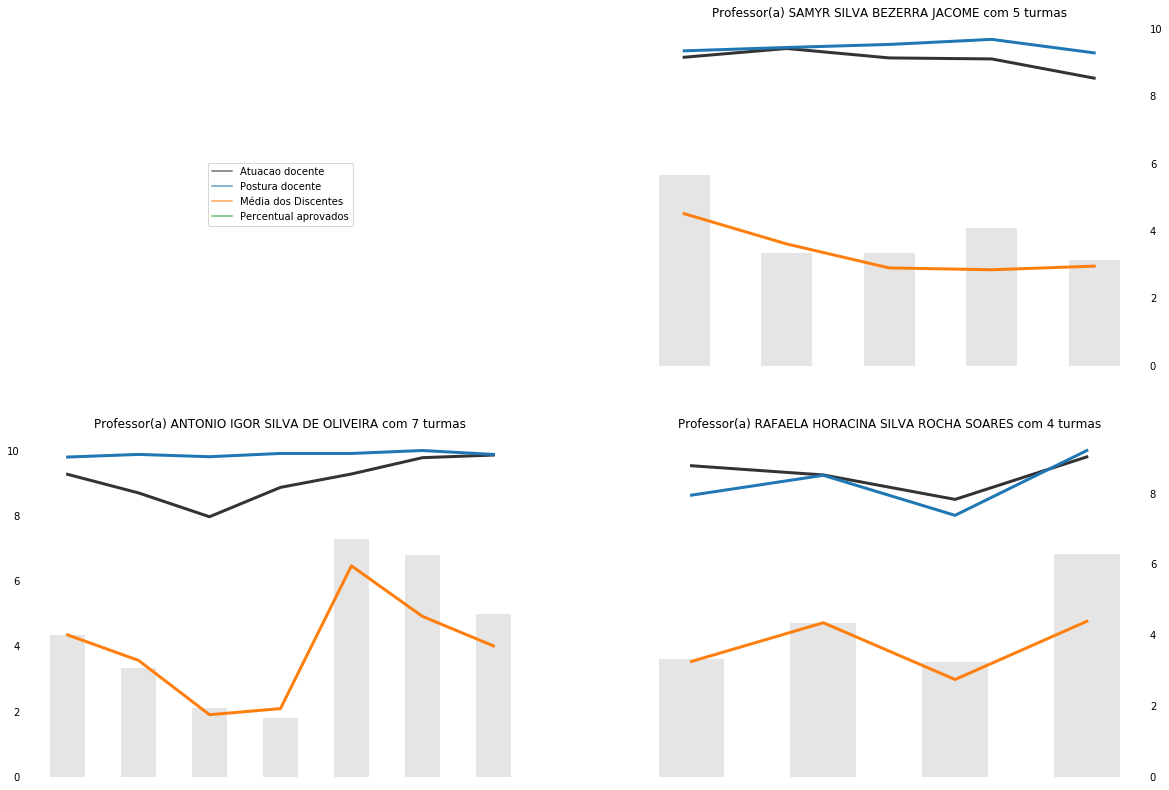

In [205]:
gerar_graf(turmas_calculo)

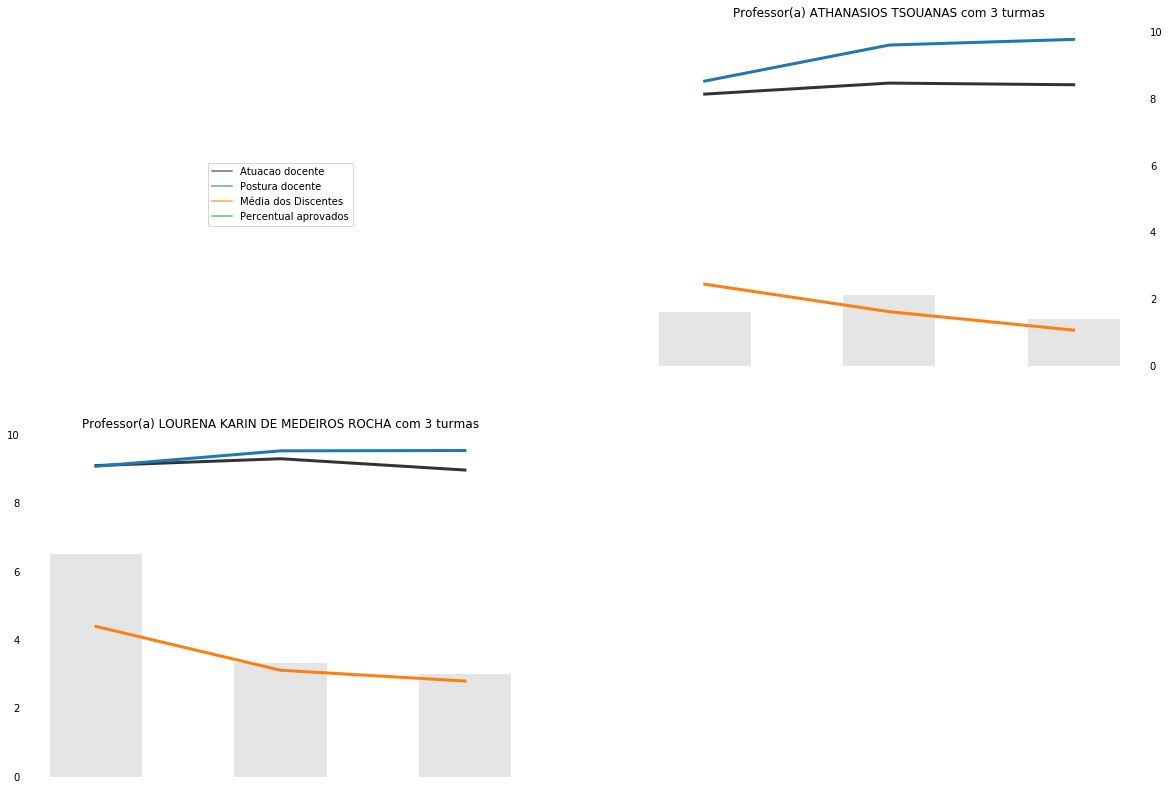

In [206]:
gerar_graf(turmas_fmc2)

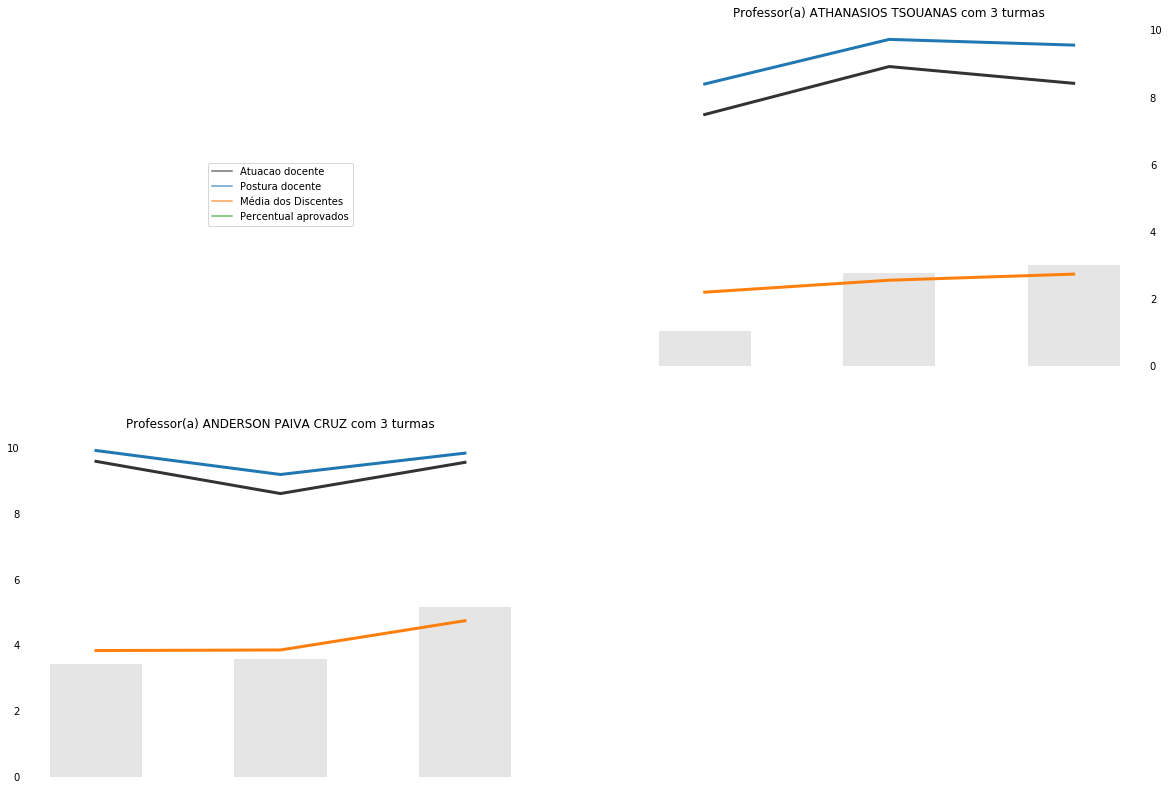

In [212]:
gerar_graf(turmas_fmc1)

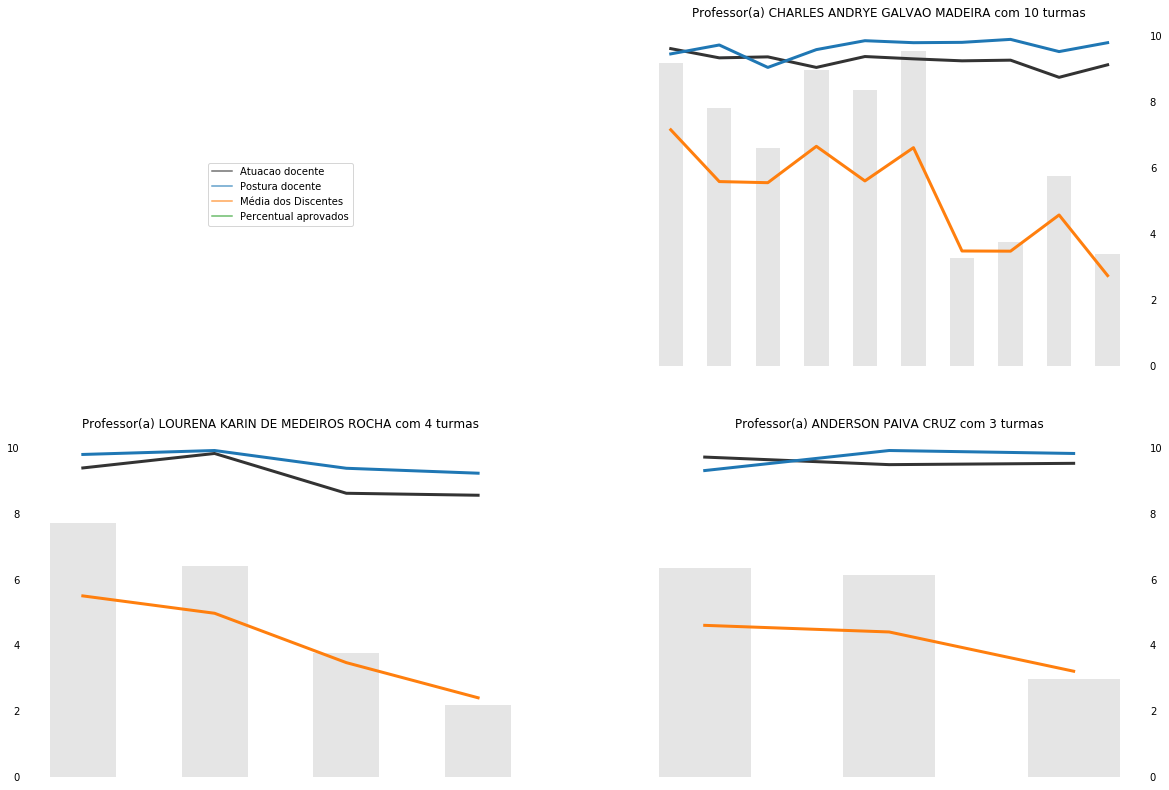

In [211]:
gerar_graf(turmas_rpmti)

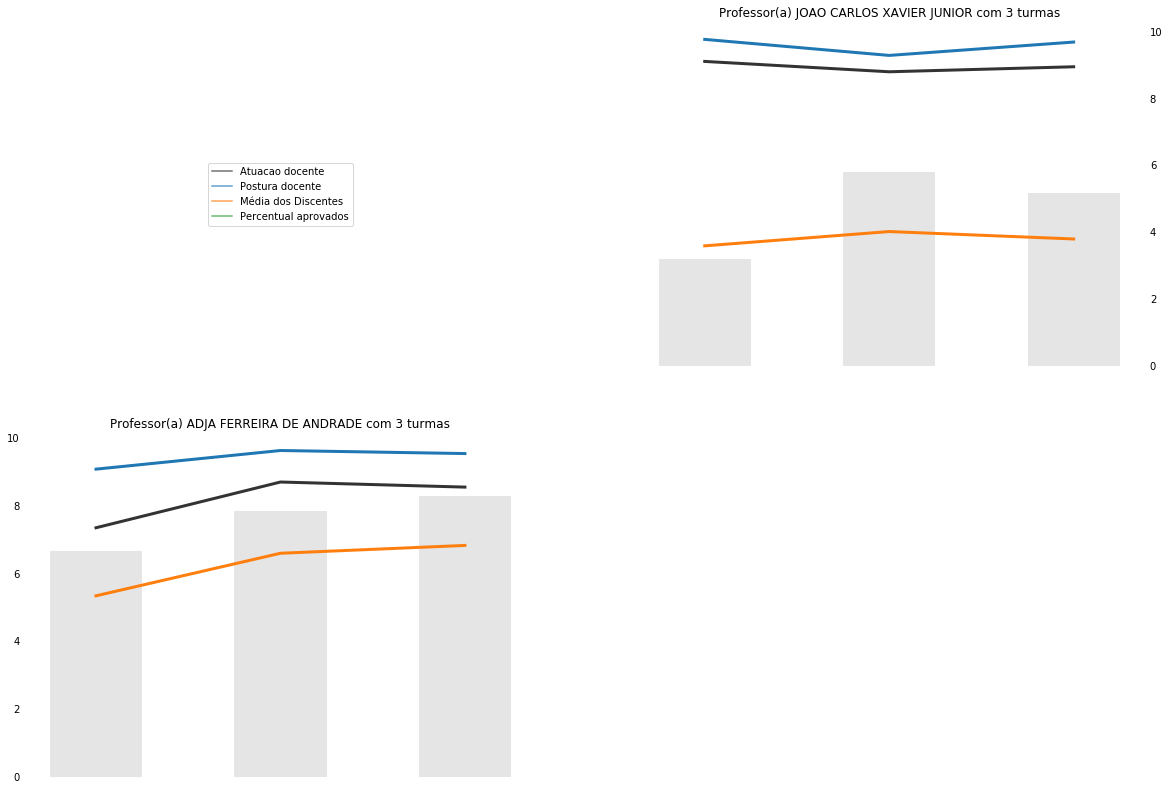

In [213]:
gerar_graf(turmas_itp)

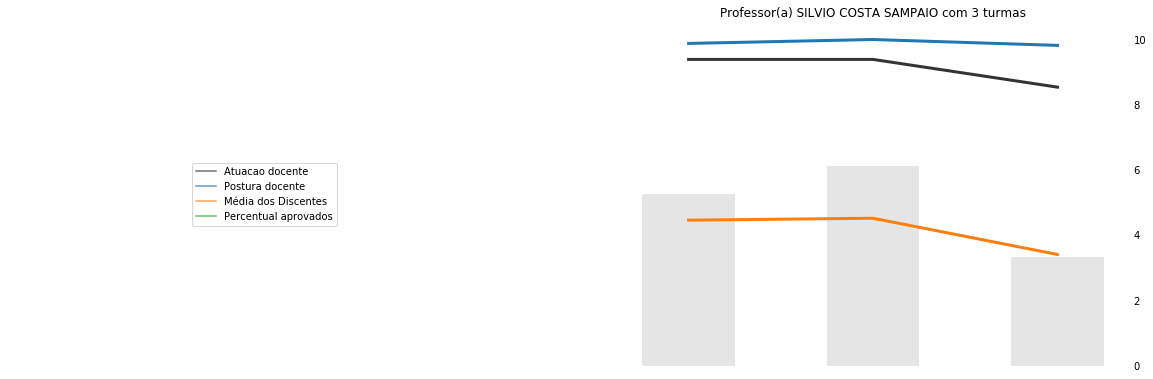

In [214]:
gerar_graf(turmas_lp)